In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

**Стационарный временной ряд** - это ряд, статистические свойства которого не изменяются со временем. Это означает, что основные характеристики ряда (среднее, дисперсия, ковариация) остаются постоянными на протяжении всего временного периода

* H₀ (нулевая гипотеза): a = 1 → есть единичный корень → ряд НЕСТАЦИОНАРЕН
* H₁ (альтернативная гипотеза): |a| < 1 → ряд СТАЦИОНАРЕН

ЗАДАНИЕ 1


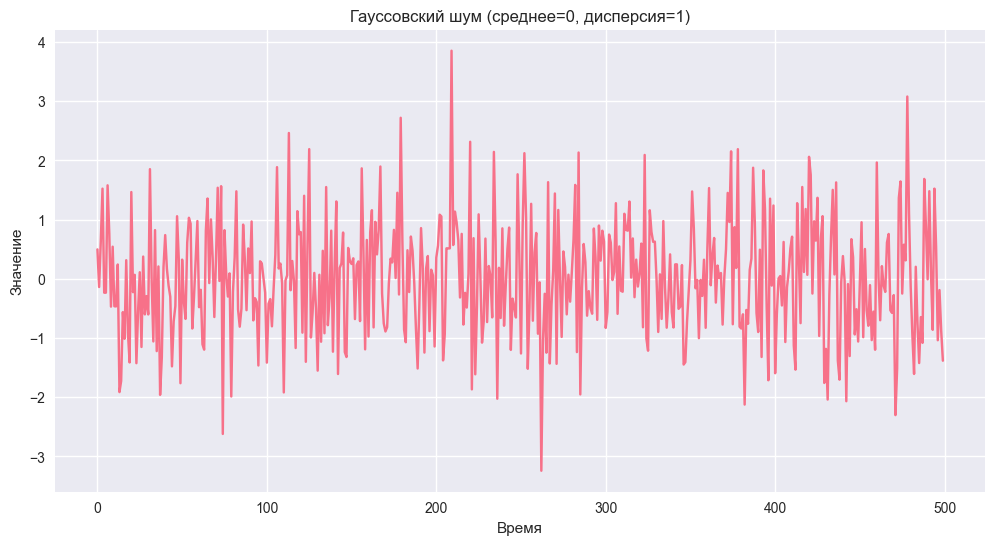

ADF Statistic: -22.343815
p-value: 0.000000
Критические значения:
	1%: -3.443523
	5%: -2.867350
	10%: -2.569864
Вывод: Ряд СТАЦИОНАРЕН (p-value < 0.05)


In [ ]:
# Задание 1
print("=" * 50)
print("ЗАДАНИЕ 1")
print("=" * 50)

# а) Генерация гауссовского шума
np.random.seed(42)
n_points = 500
gaussian_noise = np.random.normal(0, 1, n_points)

# б) Построение графика
plt.figure(figsize=(12, 6))
plt.plot(gaussian_noise)
plt.title('Гауссовский шум (среднее=0, дисперсия=1)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

# в) Тест Дики-Фуллера
result = adfuller(gaussian_noise)
print(f"ADF Statistic: {result[0]:.6f}")
print(f"p-value: {result[1]:.6f}")
print(f"Критические значения:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.6f}")

if result[1] < 0.05:
    print("Вывод: Ряд СТАЦИОНАРЕН (p-value < 0.05)")
else:
    print("Вывод: Ряд НЕ СТАЦИОНАРЕН (p-value >= 0.05)")



ЗАДАНИЕ 2


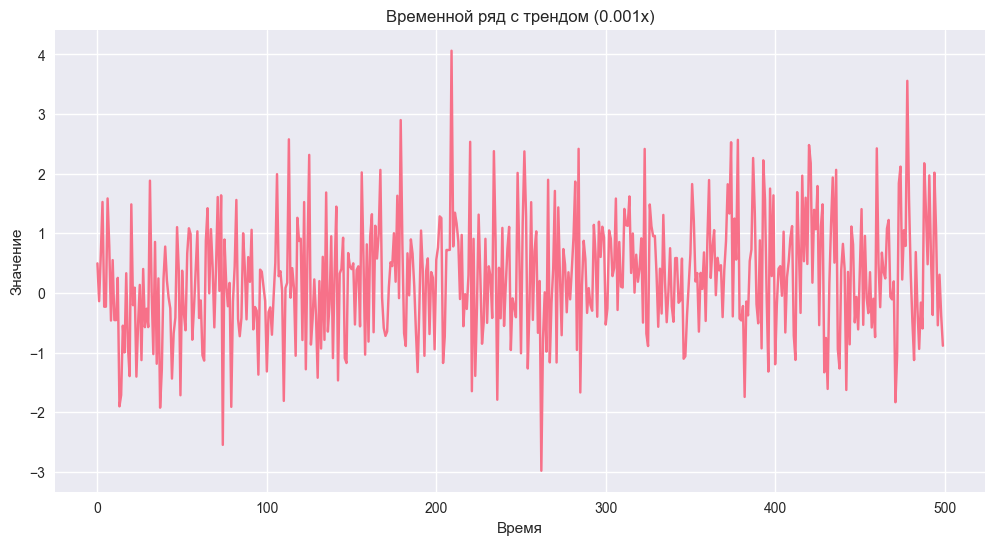

ADF Statistic: -21.730170
p-value: 0.000000
Критические значения:
	1%: -3.443523
	5%: -2.867350
	10%: -2.569864
Вывод: Ряд СТАЦИОНАРЕН (p-value < 0.05)


In [3]:
# Задание 2
print("\n" + "=" * 50)
print("ЗАДАНИЕ 2")
print("=" * 50)

# а) Добавление тренда
x = np.arange(n_points)
trend = 0.001 * x
series_with_trend = gaussian_noise + trend

# б) Построение графика
plt.figure(figsize=(12, 6))
plt.plot(series_with_trend)
plt.title('Временной ряд с трендом (0.001x)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

# в) Тест Дики-Фуллера
result = adfuller(series_with_trend)
print(f"ADF Statistic: {result[0]:.6f}")
print(f"p-value: {result[1]:.6f}")
print(f"Критические значения:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.6f}")

if result[1] < 0.05:
    print("Вывод: Ряд СТАЦИОНАРЕН (p-value < 0.05)")
else:
    print("Вывод: Ряд НЕ СТАЦИОНАРЕН (p-value >= 0.05)")



ЗАДАНИЕ 3
Первые 5 значений датасета passengers:
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

а) Анализ исходного ряда:
Часть | Среднее | Дисперсия
------------------------------
1     | 158.38   | 1071.86
2     | 269.04   | 3041.29
3     | 413.48   | 6033.62

б) Вывод о стационарности исходного ряда:
Средние значения и дисперсии значительно различаются между частями.
Ряд НЕ СТАЦИОНАРЕН

в) Анализ логарифмированного ряда:
Часть | Среднее | Дисперсия
------------------------------
1     | 5.0439 | 0.0420
2     | 5.5747 | 0.0397
3     | 6.0079 | 0.0327


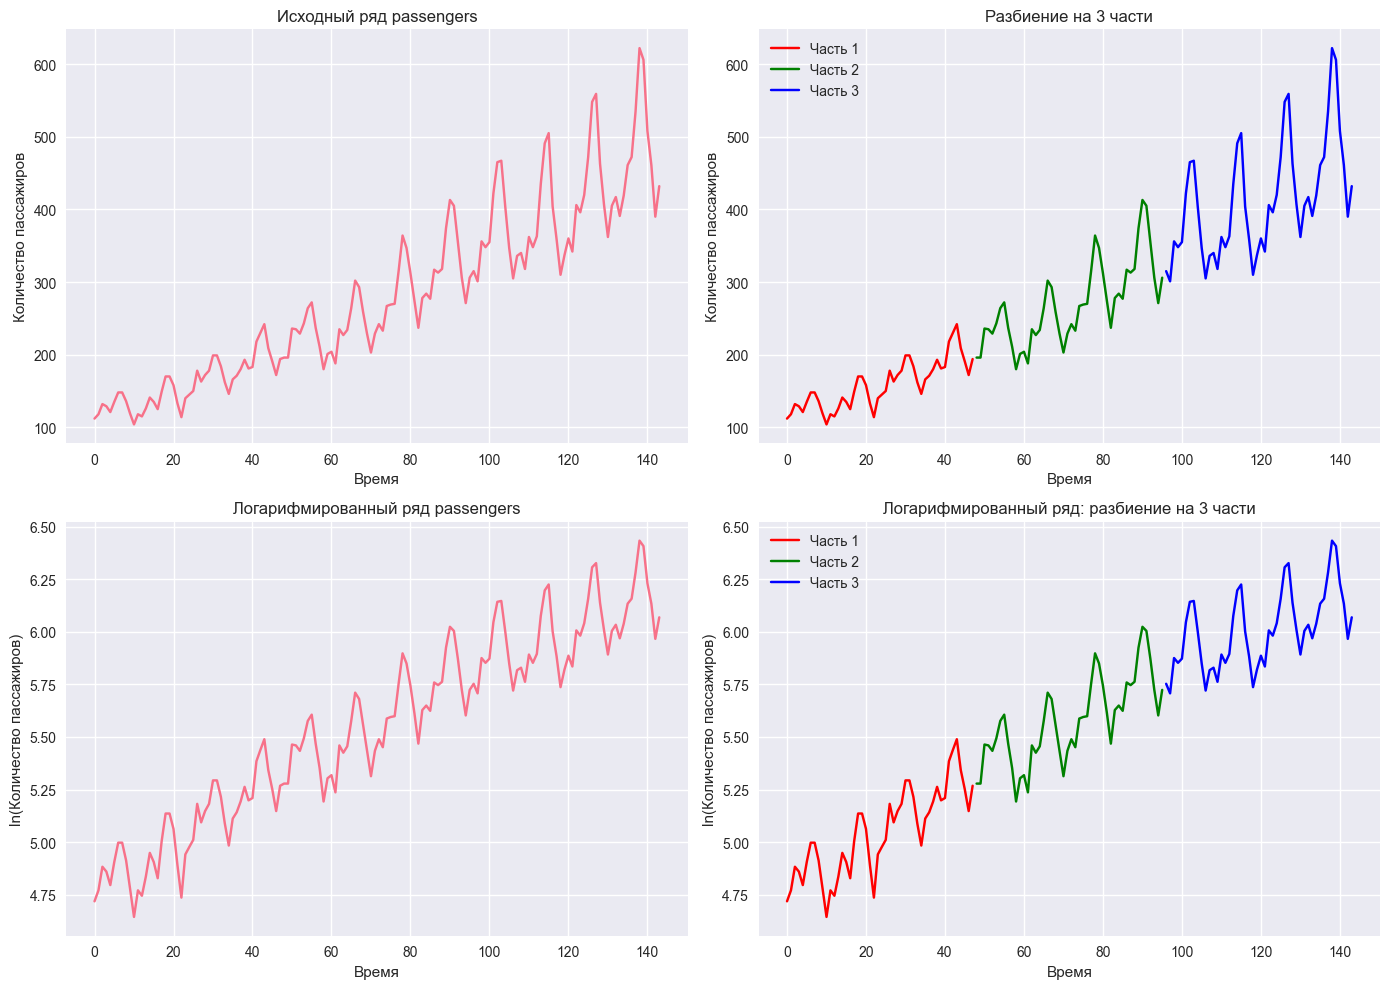


г) Вывод о стационарности логарифмированного ряда:
После логарифмирования дисперсии стали более схожими,
но средние значения все еще различаются.
Ряд все еще НЕ СТАЦИОНАРЕН, но более стабилен по дисперсии

д) Тест Дики-Фуллера на исходном датасете:
ADF Statistic: 0.815369
p-value: 0.991880
Вывод: Ряд НЕ СТАЦИОНАРЕН

е) Тест Дики-Фуллера на логарифмированном датасете:
ADF Statistic: -1.717017
p-value: 0.422367
Вывод: Ряд НЕ СТАЦИОНАРЕН

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
                         Ряд ADF Statistic p-value Стационарность
             Гауссовский шум      -22.3438  0.0000             ДА
               Шум с трендом      -21.7302  0.0000             ДА
         Исходный passengers        0.8154  0.9919            НЕТ
Логарифмированный passengers       -1.7170  0.4224            НЕТ


In [6]:
# Задание 3
print("\n" + "=" * 50)
print("ЗАДАНИЕ 3")
print("=" * 50)

# Загрузка датасета Air Passengers
passengers = pd.read_csv('passengers.csv')

print("Первые 5 значений датасета passengers:")
print(passengers.head())

# ИЗМЕНЕНИЕ: извлекаем только столбец с пассажирами
passengers_series = passengers['#Passengers']

# а) Разбиение на 3 части и расчет статистик
n = len(passengers_series)
part_length = n // 3

parts = []
for i in range(3):
    start_idx = i * part_length
    if i == 2:  # последняя часть заберет остаток
        end_idx = n
    else:
        end_idx = (i + 1) * part_length
    part = passengers_series.iloc[start_idx:end_idx]
    parts.append(part)

print("\nа) Анализ исходного ряда:")
print("Часть | Среднее | Дисперсия")
print("-" * 30)
for i, part in enumerate(parts):
    mean_val = np.mean(part)
    var_val = np.var(part)
    print(f"{i+1}     | {mean_val:.2f}   | {var_val:.2f}")

# б) Вывод о стационарности исходного ряда
print("\nб) Вывод о стационарности исходного ряда:")
print("Средние значения и дисперсии значительно различаются между частями.")
print("Ряд НЕ СТАЦИОНАРЕН")

# Визуализация исходного ряда с разбивкой
plt.figure(figsize=(14, 10))

# Исходный ряд
plt.subplot(2, 2, 1)
plt.plot(passengers_series)
plt.title('Исходный ряд passengers')
plt.xlabel('Время')
plt.ylabel('Количество пассажиров')
plt.grid(True)

# Разбивка на части
plt.subplot(2, 2, 2)
colors = ['red', 'green', 'blue']
for i, part in enumerate(parts):
    plt.plot(part.index, part.values, color=colors[i], label=f'Часть {i+1}')
plt.title('Разбиение на 3 части')
plt.xlabel('Время')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.grid(True)

# в) Логарифмирование и разбиение на 3 части
log_passengers = np.log(passengers_series)

log_parts = []
for i in range(3):
    start_idx = i * part_length
    if i == 2:
        end_idx = n
    else:
        end_idx = (i + 1) * part_length
    part = log_passengers.iloc[start_idx:end_idx]
    log_parts.append(part)

print("\nв) Анализ логарифмированного ряда:")
print("Часть | Среднее | Дисперсия")
print("-" * 30)
for i, part in enumerate(log_parts):
    mean_val = np.mean(part)
    var_val = np.var(part)
    print(f"{i+1}     | {mean_val:.4f} | {var_val:.4f}")

# Логарифмированный ряд
plt.subplot(2, 2, 3)
plt.plot(log_passengers)
plt.title('Логарифмированный ряд passengers')
plt.xlabel('Время')
plt.ylabel('ln(Количество пассажиров)')
plt.grid(True)

# Разбивка логарифмированного ряда на части
plt.subplot(2, 2, 4)
for i, part in enumerate(log_parts):
    plt.plot(part.index, part.values, color=colors[i], label=f'Часть {i+1}')
plt.title('Логарифмированный ряд: разбиение на 3 части')
plt.xlabel('Время')
plt.ylabel('ln(Количество пассажиров)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# г) Вывод о стационарности логарифмированного ряда
print("\nг) Вывод о стационарности логарифмированного ряда:")
print("После логарифмирования дисперсии стали более схожими,")
print("но средние значения все еще различаются.")
print("Ряд все еще НЕ СТАЦИОНАРЕН, но более стабилен по дисперсии")

# д) DF-тест на исходном датасете
print("\nд) Тест Дики-Фуллера на исходном датасете:")
result_original = adfuller(passengers_series)
print(f"ADF Statistic: {result_original[0]:.6f}")
print(f"p-value: {result_original[1]:.6f}")

if result_original[1] < 0.05:
    print("Вывод: Ряд СТАЦИОНАРЕН")
else:
    print("Вывод: Ряд НЕ СТАЦИОНАРЕН")

# е) DF-тест на логарифмированном датасете
print("\nе) Тест Дики-Фуллера на логарифмированном датасете:")
result_log = adfuller(log_passengers)
print(f"ADF Statistic: {result_log[0]:.6f}")
print(f"p-value: {result_log[1]:.6f}")

if result_log[1] < 0.05:
    print("Вывод: Ряд СТАЦИОНАРЕН")
else:
    print("Вывод: Ряд НЕ СТАЦИОНАРЕН")

# Сводная таблица результатов
print("\n" + "=" * 60)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 60)

results_data = {
    'Ряд': ['Гауссовский шум', 'Шум с трендом', 'Исходный passengers', 'Логарифмированный passengers'],
    'ADF Statistic': [
        f"{adfuller(gaussian_noise)[0]:.4f}",
        f"{adfuller(series_with_trend)[0]:.4f}", 
        f"{result_original[0]:.4f}",
        f"{result_log[0]:.4f}"
    ],
    'p-value': [
        f"{adfuller(gaussian_noise)[1]:.4f}",
        f"{adfuller(series_with_trend)[1]:.4f}",
        f"{result_original[1]:.4f}",
        f"{result_log[1]:.4f}"
    ],
    'Стационарность': [
        'ДА' if adfuller(gaussian_noise)[1] < 0.05 else 'НЕТ',
        'ДА' if adfuller(series_with_trend)[1] < 0.05 else 'НЕТ',
        'ДА' if result_original[1] < 0.05 else 'НЕТ',
        'ДА' if result_log[1] < 0.05 else 'НЕТ'
    ]
}

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False))

ЗАДАНИЕ 4
Тест Дики-Фуллера для датасета passengers с разными параметрами regression

ИСХОДНЫЙ РЯД passengers:
--------------------------------------------------
regression='ct' (с константой и линейным трендом):
  ADF Statistic: -2.100782
  p-value: 0.545659
  Критические значения:
    1%: -4.030152
    5%: -3.444818
    10%: -3.147182
  Вывод: Ряд НЕ СТАЦИОНАРЕН (p-value >= 0.05)

regression='ctt' (с константой, линейным и квадратичным трендом):
  ADF Statistic: -3.233678
  p-value: 0.195942
  Критические значения:
    1%: -4.462542
    5%: -3.878611
    10%: -3.581753
  Вывод: Ряд НЕ СТАЦИОНАРЕН (p-value >= 0.05)

regression='n' (без константы и тренда):
  ADF Statistic: 2.390602
  p-value: 0.997180
  Критические значения:
    1%: -2.583153
    5%: -1.943251
    10%: -1.614926
  Вывод: Ряд НЕ СТАЦИОНАРЕН (p-value >= 0.05)


ЛОГАРИФМИРОВАННЫЙ РЯД passengers:
--------------------------------------------------
regression='ct' (с константой и линейным трендом):
  ADF Statistic: -2.14703

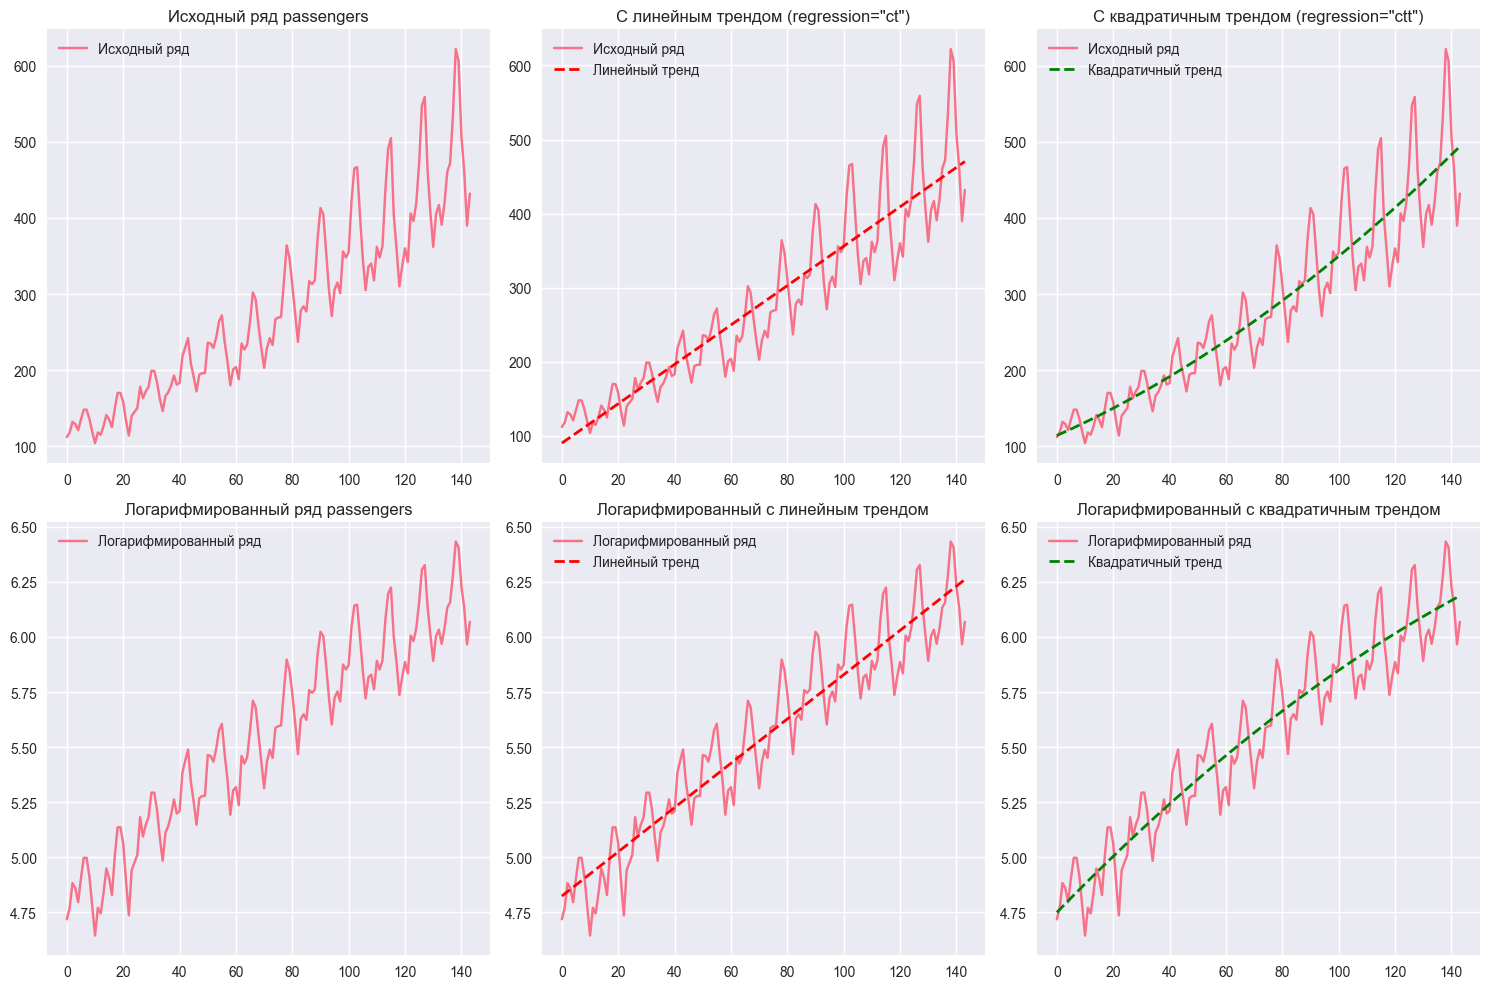

ОБЪЯСНЕНИЕ РЕЗУЛЬТАТОВ

Параметр regression в тесте Дики-Фуллера определяет, какие детерминистические 
компоненты включаются в тестовую регрессию:

1. 'n' (none) - без константы и тренда: y_t = a*y_{t-1} + ε_t
2. 'c' (constant) - с константой: y_t = c + a*y_{t-1} + ε_t  
3. 'ct' (constant + trend) - с константой и линейным трендом: y_t = c + d*t + a*y_{t-1} + ε_t
4. 'ctt' (constant + trend + quadratic trend) - с константой, линейным и квадратичным трендом

АНАЛИЗ РЕЗУЛЬТАТОВ:

1. Для исходного ряда passengers:
   - Все тесты показывают p-value > 0.05, что свидетельствует о НЕСТАЦИОНАРНОСТИ
   - Наличие выраженного восходящего тренда делает ряд нестационарным

2. Для логарифмированного ряда:
   - Тесты также показывают нестационарность (p-value > 0.05)
   - Логарифмирование помогло стабилизировать дисперсию, но не устранило тренд

3. Сравнение различных regression параметров:
   - 'ct' и 'ctt' учитывают тренд в данных, что более реалистично для этого ряда
   - 'n' (без тренда) дает мене

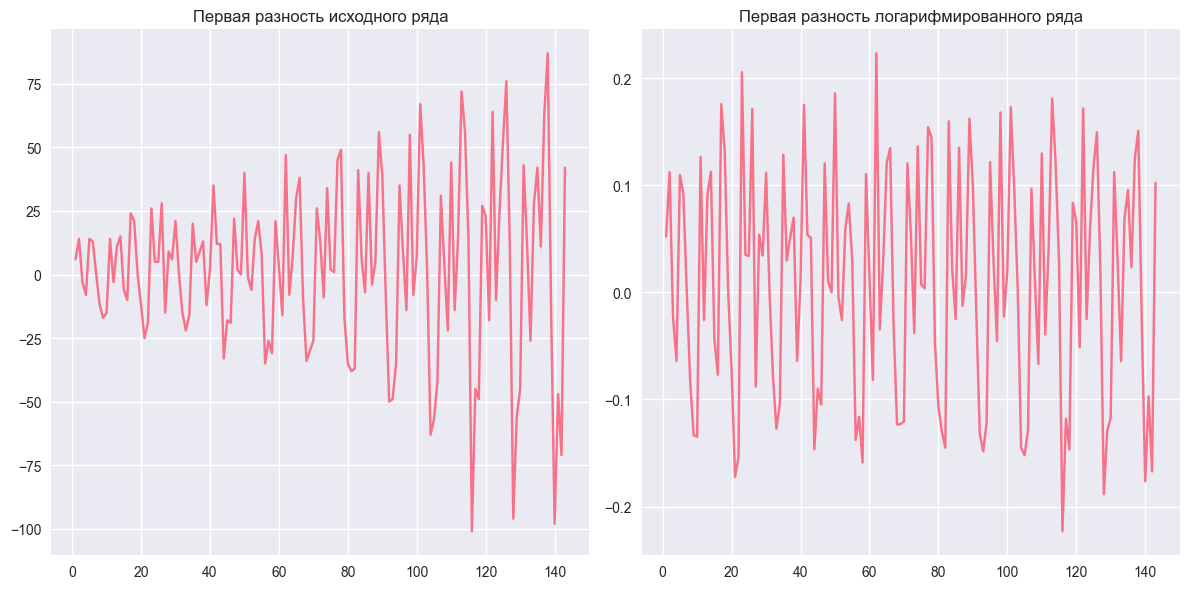

In [7]:
print("=" * 60)
print("ЗАДАНИЕ 4")
print("=" * 60)

print("Тест Дики-Фуллера для датасета passengers с разными параметрами regression\n")

# Проведем тест с разными параметрами regression
regression_types = ['ct', 'ctt', 'n']
regression_names = {
    'ct': 'с константой и линейным трендом',
    'ctt': 'с константой, линейным и квадратичным трендом', 
    'n': 'без константы и тренда'
}

print("ИСХОДНЫЙ РЯД passengers:")
print("-" * 50)

for reg_type in regression_types:
    result = adfuller(passengers_series, regression=reg_type)
    print(f"regression='{reg_type}' ({regression_names[reg_type]}):")
    print(f"  ADF Statistic: {result[0]:.6f}")
    print(f"  p-value: {result[1]:.6f}")
    print(f"  Критические значения:")
    for key, value in result[4].items():
        print(f"    {key}: {value:.6f}")
    
    if result[1] < 0.05:
        print("  Вывод: Ряд СТАЦИОНАРЕН (p-value < 0.05)")
    else:
        print("  Вывод: Ряд НЕ СТАЦИОНАРЕН (p-value >= 0.05)")
    print()

print("\nЛОГАРИФМИРОВАННЫЙ РЯД passengers:")
print("-" * 50)

for reg_type in regression_types:
    result = adfuller(log_passengers, regression=reg_type)
    print(f"regression='{reg_type}' ({regression_names[reg_type]}):")
    print(f"  ADF Statistic: {result[0]:.6f}")
    print(f"  p-value: {result[1]:.6f}")
    print(f"  Критические значения:")
    for key, value in result[4].items():
        print(f"    {key}: {value:.6f}")
    
    if result[1] < 0.05:
        print("  Вывод: Ряд СТАЦИОНАРЕН (p-value < 0.05)")
    else:
        print("  Вывод: Ряд НЕ СТАЦИОНАРЕН (p-value >= 0.05)")
    print()

# Визуализация для понимания трендов
plt.figure(figsize=(15, 10))

# Исходный ряд с разными трендами
plt.subplot(2, 3, 1)
plt.plot(passengers_series, label='Исходный ряд')
plt.title('Исходный ряд passengers')
plt.legend()
plt.grid(True)

# Линейный тренд
plt.subplot(2, 3, 2)
plt.plot(passengers_series, label='Исходный ряд')
x = np.arange(len(passengers_series))
# Линейная регрессия для демонстрации линейного тренда
coef_linear = np.polyfit(x, passengers_series, 1)
linear_trend = np.polyval(coef_linear, x)
plt.plot(x, linear_trend, 'r--', label='Линейный тренд', linewidth=2)
plt.title('С линейным трендом (regression="ct")')
plt.legend()
plt.grid(True)

# Квадратичный тренд
plt.subplot(2, 3, 3)
plt.plot(passengers_series, label='Исходный ряд')
# Квадратичная регрессия для демонстрации квадратичного тренда
coef_quad = np.polyfit(x, passengers_series, 2)
quad_trend = np.polyval(coef_quad, x)
plt.plot(x, quad_trend, 'g--', label='Квадратичный тренд', linewidth=2)
plt.title('С квадратичным трендом (regression="ctt")')
plt.legend()
plt.grid(True)

# Логарифмированный ряд с разными трендами
plt.subplot(2, 3, 4)
plt.plot(log_passengers, label='Логарифмированный ряд')
plt.title('Логарифмированный ряд passengers')
plt.legend()
plt.grid(True)

# Линейный тренд для логарифмированного ряда
plt.subplot(2, 3, 5)
plt.plot(log_passengers, label='Логарифмированный ряд')
coef_linear_log = np.polyfit(x, log_passengers, 1)
linear_trend_log = np.polyval(coef_linear_log, x)
plt.plot(x, linear_trend_log, 'r--', label='Линейный тренд', linewidth=2)
plt.title('Логарифмированный с линейным трендом')
plt.legend()
plt.grid(True)

# Квадратичный тренд для логарифмированного ряда
plt.subplot(2, 3, 6)
plt.plot(log_passengers, label='Логарифмированный ряд')
coef_quad_log = np.polyfit(x, log_passengers, 2)
quad_trend_log = np.polyval(coef_quad_log, x)
plt.plot(x, quad_trend_log, 'g--', label='Квадратичный тренд', linewidth=2)
plt.title('Логарифмированный с квадратичным трендом')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Объяснение результатов
print("=" * 80)
print("ОБЪЯСНЕНИЕ РЕЗУЛЬТАТОВ")
print("=" * 80)

print("""
Параметр regression в тесте Дики-Фуллера определяет, какие детерминистические 
компоненты включаются в тестовую регрессию:

1. 'n' (none) - без константы и тренда: y_t = a*y_{t-1} + ε_t
2. 'c' (constant) - с константой: y_t = c + a*y_{t-1} + ε_t  
3. 'ct' (constant + trend) - с константой и линейным трендом: y_t = c + d*t + a*y_{t-1} + ε_t
4. 'ctt' (constant + trend + quadratic trend) - с константой, линейным и квадратичным трендом

АНАЛИЗ РЕЗУЛЬТАТОВ:

1. Для исходного ряда passengers:
   - Все тесты показывают p-value > 0.05, что свидетельствует о НЕСТАЦИОНАРНОСТИ
   - Наличие выраженного восходящего тренда делает ряд нестационарным

2. Для логарифмированного ряда:
   - Тесты также показывают нестационарность (p-value > 0.05)
   - Логарифмирование помогло стабилизировать дисперсию, но не устранило тренд

3. Сравнение различных regression параметров:
   - 'ct' и 'ctt' учитывают тренд в данных, что более реалистично для этого ряда
   - 'n' (без тренда) дает менее надежные результаты для рядов с трендом
   - Критические значения различаются для разных спецификаций теста

ВЫВОД:
Ряд passengers является нестационарным из-за наличия выраженного восходящего тренда
и, возможно, сезонности. Для приведения к стационарности потребуется дифференцирование
(вычитание предыдущих значений) для устранения тренда.
""")

# Дополнительно: тест после дифференцирования (первой разности)
print("\n" + "=" * 50)
print("ДОПОЛНИТЕЛЬНО: Тест после первой разности")
print("=" * 50)

# Первая разность для устранения тренда
diff_passengers = passengers_series.diff().dropna()
diff_log_passengers = log_passengers.diff().dropna()

print("Первая разность исходного ряда:")
result_diff = adfuller(diff_passengers, regression='c')
print(f"ADF Statistic: {result_diff[0]:.6f}")
print(f"p-value: {result_diff[1]:.6f}")
if result_diff[1] < 0.05:
    print("Вывод: Ряд СТАЦИОНАРЕН после дифференцирования")
else:
    print("Вывод: Ряд все еще НЕ СТАЦИОНАРЕН")

print("\nПервая разность логарифмированного ряда:")
result_diff_log = adfuller(diff_log_passengers, regression='c')
print(f"ADF Statistic: {result_diff_log[0]:.6f}")
print(f"p-value: {result_diff_log[1]:.6f}")
if result_diff_log[1] < 0.05:
    print("Вывод: Ряд СТАЦИОНАРЕН после дифференцирования")
else:
    print("Вывод: Ряд все еще НЕ СТАЦИОНАРЕН")

# Визуализация дифференцированных рядов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(diff_passengers)
plt.title('Первая разность исходного ряда')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(diff_log_passengers)
plt.title('Первая разность логарифмированного ряда')
plt.grid(True)

plt.tight_layout()
plt.show()